In [7]:
from apps.deep.model_analyzer import ModelAnalyzer
from src.deep.data_loaders import SingleMuDataSet
from src.deep.models import PaperNNforNFTwrapper
%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm

from src.deep.ml_ops import Trainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load trainer from file
trainer: Trainer = Trainer.load3('../../data/saved_models/9_layers_model__ds-4000__epochs-30_mu-0.008')
# trainer = Trainer.load3('../../data/test_models/SingleMuModel3Layers_ds-120_epochs-2_mu-0.001')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/saved_models/9_layers_model__ds-4000__epochs-30_mu-0.008/model_state_dict.pt'

In [ ]:
# TODO: create function Trainer.fix_datasets_paths(dataset_path)
trainer.fix_datasets_paths(dataset_path='../../data/datasets', verbose=False)

In [ ]:
trainer.test_single_item(0, verbose=True)

In [ ]:
trainer.plot_loss_vec()

In [ ]:
# calc original ber
trainer.compare_ber(tqdm=tqdm, num_x_per_folder=15)

In [ ]:
# print model's architecture
trainer.model.print_architecture(x)

In [6]:
# paper 1 model analyzer
path_init = '../../data/test_models/mu-0.008__128ds__PaperNNforNFTmodel__3epochs'

trainer_real = Trainer.load3(path_init + '__real')
trainer_imag = Trainer.load3(path_init + '__imag')

train_ds = SingleMuDataSet(trainer_real.train_dataset.data_dir_path,
                           trainer_real.train_dataset.data_indices)
val_ds = SingleMuDataSet(trainer_real.val_dataset.data_dir_path,
                         trainer_real.val_dataset.data_indices)

model = PaperNNforNFTwrapper(trainer_real.model, trainer_imag.model)

trainer = Trainer(
    train_dataset=train_ds,
    val_dataset=val_ds,
    model=model,
    device=trainer_real.device,
    batch_size=trainer_real.train_dataloader.batch_size,
    l_metric=trainer_real.l_metric,
    optim=trainer_real.optim,
    params=trainer_real.params)

In [9]:
trainer.params

{'lr': 0.001,
 'epochs': 3,
 'batch_size': 1,
 'train_val_ratio': 0.8,
 'input_data_path': './data/datasets/qam1024_160x20/160_samples_mu=0.008',
 'output_model_path': './data/test_models',
 'device': 'cpu',
 'wandb_project': 'thesis_model_scan_test'}

In [11]:
ma = ModelAnalyzer(trainer)

/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


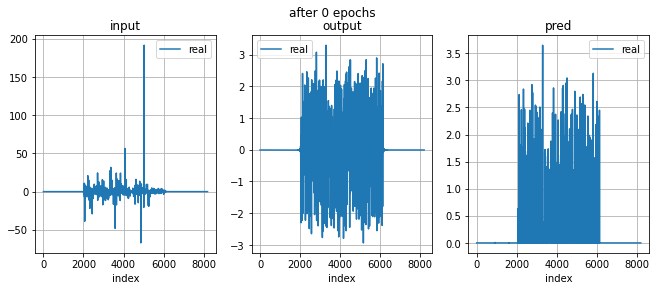

In [10]:
ma.plot_single_item(i=0)

In [15]:
ma.plot_bers(_tqdm=tqdm)

  0%|          | 0/32 [00:00<?, ?it/s]

the original avg ber (of validation set) is 0.226708984375


  0%|          | 0/32 [00:00<?, ?it/s]

the trained avg ber (of validation set) is 0.358026123046875
the ber improvement is -57.92%
